In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score
 
from sklearn import metrics 

In [63]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


### Data Preprocessing

In [64]:
# add "affair" column: 1 represents having affairs, 0 represents not having affairs
dta['affair'] = (dta.affairs > 0).astype(int)
dta.affair.unique()

array([1, 0])

In [65]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

X = X.rename(columns = 
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})


X.head()


,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [66]:
## Concatinating X & y

dta = pd.concat([X,y], axis = 1)
dta.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [67]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Intercept      6366 non-null   float64
 1   occ_2          6366 non-null   float64
 2   occ_3          6366 non-null   float64
 3   occ_4          6366 non-null   float64
 4   occ_5          6366 non-null   float64
 5   occ_6          6366 non-null   float64
 6   occ_husb_2     6366 non-null   float64
 7   occ_husb_3     6366 non-null   float64
 8   occ_husb_4     6366 non-null   float64
 9   occ_husb_5     6366 non-null   float64
 10  occ_husb_6     6366 non-null   float64
 11  rate_marriage  6366 non-null   float64
 12  age            6366 non-null   float64
 13  yrs_married    6366 non-null   float64
 14  children       6366 non-null   float64
 15  religious      6366 non-null   float64
 16  educ           6366 non-null   float64
 17  affair         6366 non-null   float64
dtypes: float

In [68]:
## Checking for null values in the dataframe

dta.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affair           0
dtype: int64

In [69]:
#Checking the SHape of the dataframe

print(f"The shape of the data is {dta.shape}")

divorced = dta[dta.affair==1].shape
Not_divorced = dta[dta.affair==0].shape

print("Affairs == 1", (divorced))
print("Affairs == 0", (Not_divorced))

The shape of the data is (6366, 18)
Affairs == 1 (2053, 18)
Affairs == 0 (4313, 18)


### Exploratory Data Analysis

Text(0.5, 1.0, 'Counts of the Target Variable (affair)')

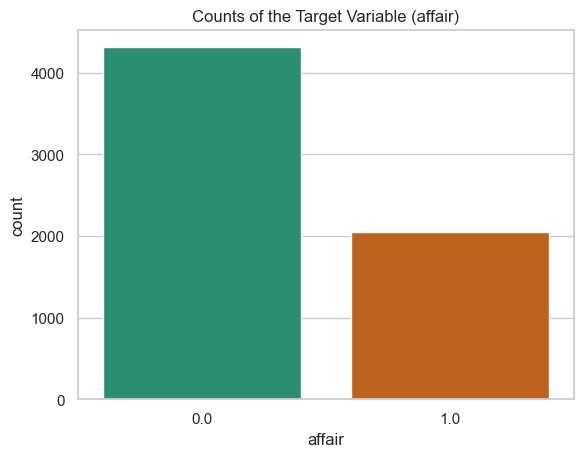

In [70]:
# Counts of the Target variable

sns.set_theme(style="whitegrid")
sns.countplot(x='affair', data=dta, palette="Dark2")
plt.title("Counts of the Target Variable (affair)")

##### From the above graph we can infer that the data is highly imbalanced. So we have to balance the dataset

In [71]:
from imblearn.over_sampling  import RandomOverSampler

rdm = RandomOverSampler()
X,y = rdm.fit_resample(X,y)
df = pd.concat([X,y],axis=1)

print(f'''Affairs = 0: {df[df["affair"]==0].shape}
Affairs = 1: {df[df["affair"]==1].shape}''')


Affairs = 0: (4313, 18)
Affairs = 1: (4313, 18)


Text(0.5, 1.0, 'Counts of the Target Variable (affair)')

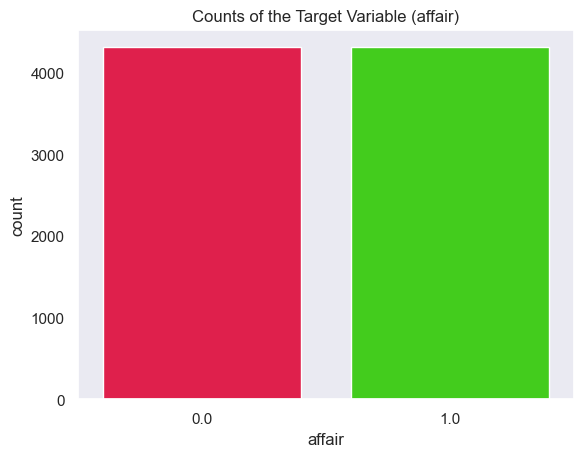

In [72]:
sns.set_theme(style="dark")
sns.countplot(x='affair', data=df, palette="prism_r")
plt.title("Counts of the Target Variable (affair)")

##### Now the data is perfectly balanced.

Text(0.5, 0, 'Number of Children')

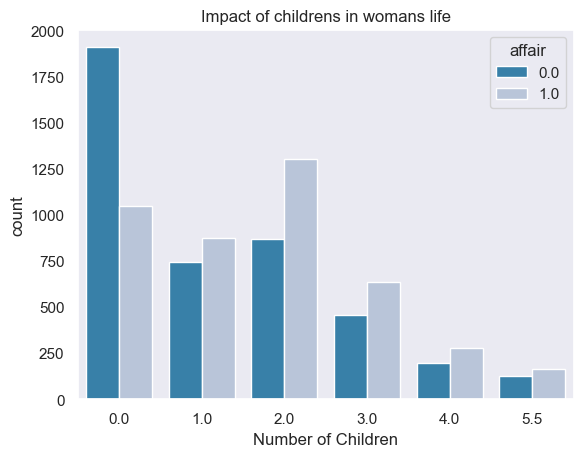

In [73]:
sns.set_theme(style="dark")
sns.countplot(data=df, x="children", hue="affair", palette="PuBu_r")

plt.title("Impact of childrens in womans life")
plt.xlabel("Number of Children")

Text(0.5, 0, 'Ages')

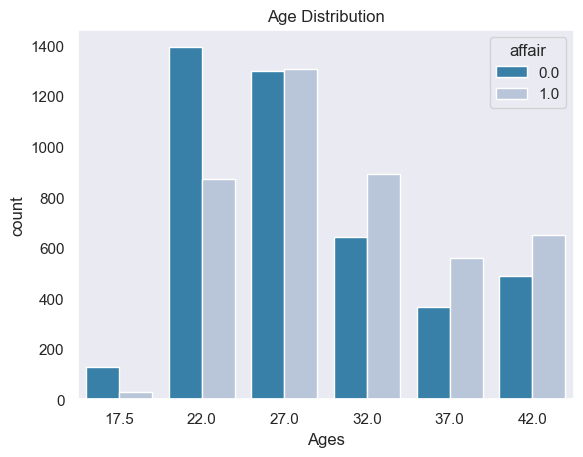

In [74]:
sns.set_theme(style="dark")
sns.countplot(data=df, x="age", hue="affair", palette="PuBu_r")

plt.title("Age Distribution")
plt.xlabel("Ages")

Text(0.5, 0, 'Ratings')

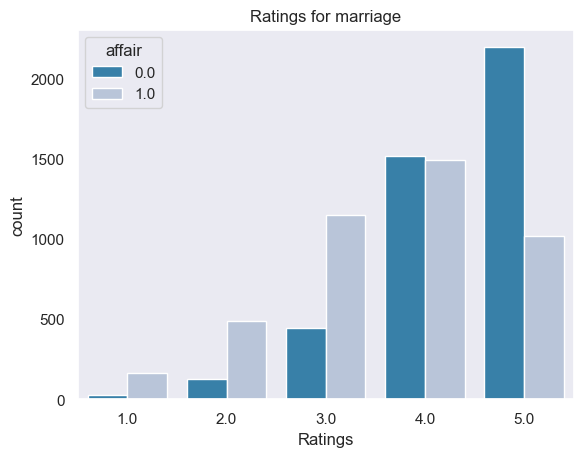

In [75]:
sns.set_theme(style="dark")
sns.countplot(data=df, x="rate_marriage", hue="affair", palette="PuBu_r")

plt.title("Ratings for marriage")
plt.xlabel("Ratings")

Text(0.5, 0, 'Education')

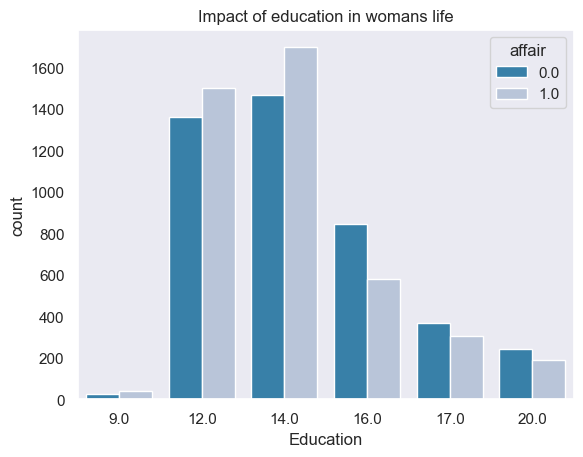

In [76]:
sns.set_theme(style="dark")
sns.countplot(data=df, x="educ", hue="affair", palette="PuBu_r")

plt.title("Impact of education in womans life")
plt.xlabel("Education")

Text(0.5, 0, 'Religion')

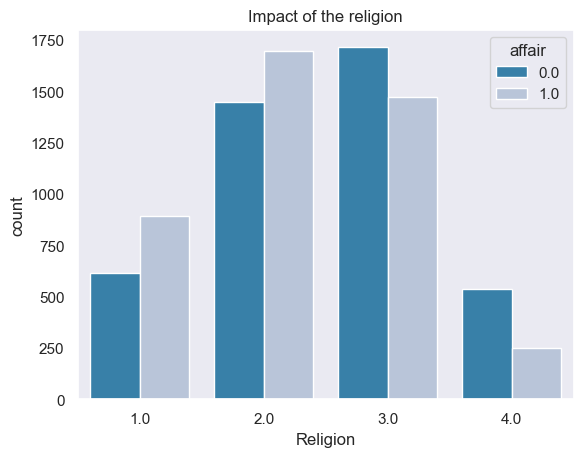

In [77]:
sns.set_theme(style="dark")
sns.countplot(data=df, x="religious", hue="affair", palette="PuBu_r")

plt.title("Impact of the religion")
plt.xlabel("Religion")

### Model 

In [83]:
from sklearn.model_selection import train_test_split

y = df['affair']
X = df.drop('affair', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [87]:
print(f'''X_train: {X_train.shape}
y_train: {y_train.shape}
X_test: {X_test.shape}
y_test: {y_test.shape}
''')


X_train: (6900, 17)
y_train: (6900,)
X_test: (1726, 17)
y_test: (1726,)



In [88]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

training_y_predicted = LR.predict(X_train)
predicted_y = LR.predict(X_test)


C:\Users\marsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Evaluation

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, ConfusionMatrixDisplay

print("Training accuracy score is:", accuracy_score(y_train, training_y_predicted))
print("Testing accuracy score is:", accuracy_score(y_test, predicted_y))

Training accuracy score is: 0.6904347826086956
Testing accuracy score is: 0.6859791425260718


[[598 256]
 [286 586]]


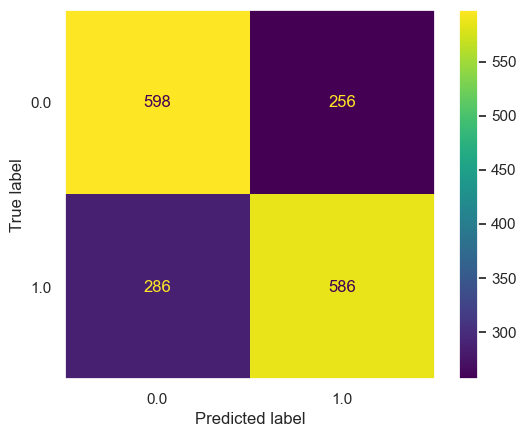

In [99]:
cm =confusion_matrix(y_test, predicted_y)
print(cm)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cmd.plot()

In [105]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69       854
         1.0       0.70      0.67      0.68       872

    accuracy                           0.69      1726
   macro avg       0.69      0.69      0.69      1726
weighted avg       0.69      0.69      0.69      1726



In [135]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_y)


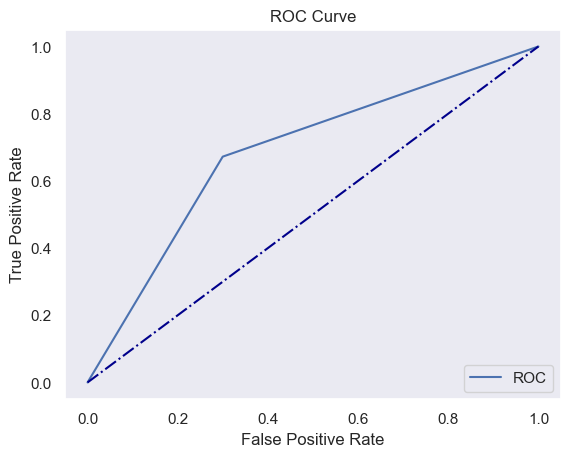

In [133]:
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='dashdot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend(loc='lower right')

In [145]:
print("My prediction is", LR.predict(np.array([[0,0,0,0,0,1,1,0,0,0,0,2,27,13,4,1,14]])))

My prediction is [1.]


C:\Users\marsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
